In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
song_df = pd.read_csv(r"..\Excersises\nigerian-songs.csv")

In [3]:
song_df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [ ]:
song_df.info()

In [ ]:
song_df.isnull().sum()

In [ ]:
song_df.describe()

EDA

In [ ]:
#find out the most popular genres

top = song_df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [ ]:
#Get rid of missing data by filtering it out
song_df = song_df[song_df['artist_top_genre'] != 'Missing']
top = song_df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [ ]:
#filter the dataset to remove anything with a 0 popularity value in the 3 top genres(noise)
song_df= song_df[(song_df['artist_top_genre'] == 'afro dancehall') | (song_df['artist_top_genre'] == 'afropop') | (song_df['artist_top_genre'] == 'nigerian pop')]
song_df = song_df[(song_df['popularity'] > 0)]
top = song_df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [ ]:
corrmat = song_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

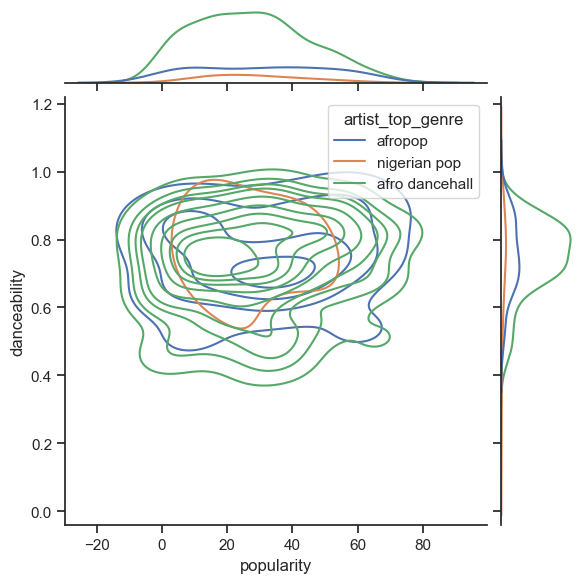

In [55]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=song_df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


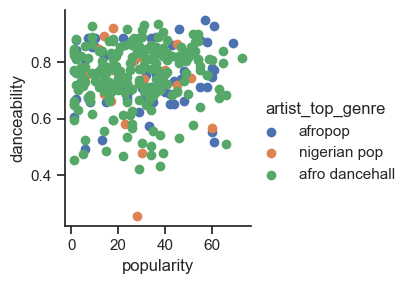

In [65]:
sns.FacetGrid(song_df, hue="artist_top_genre") \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

<Axes: xlabel='release_date'>

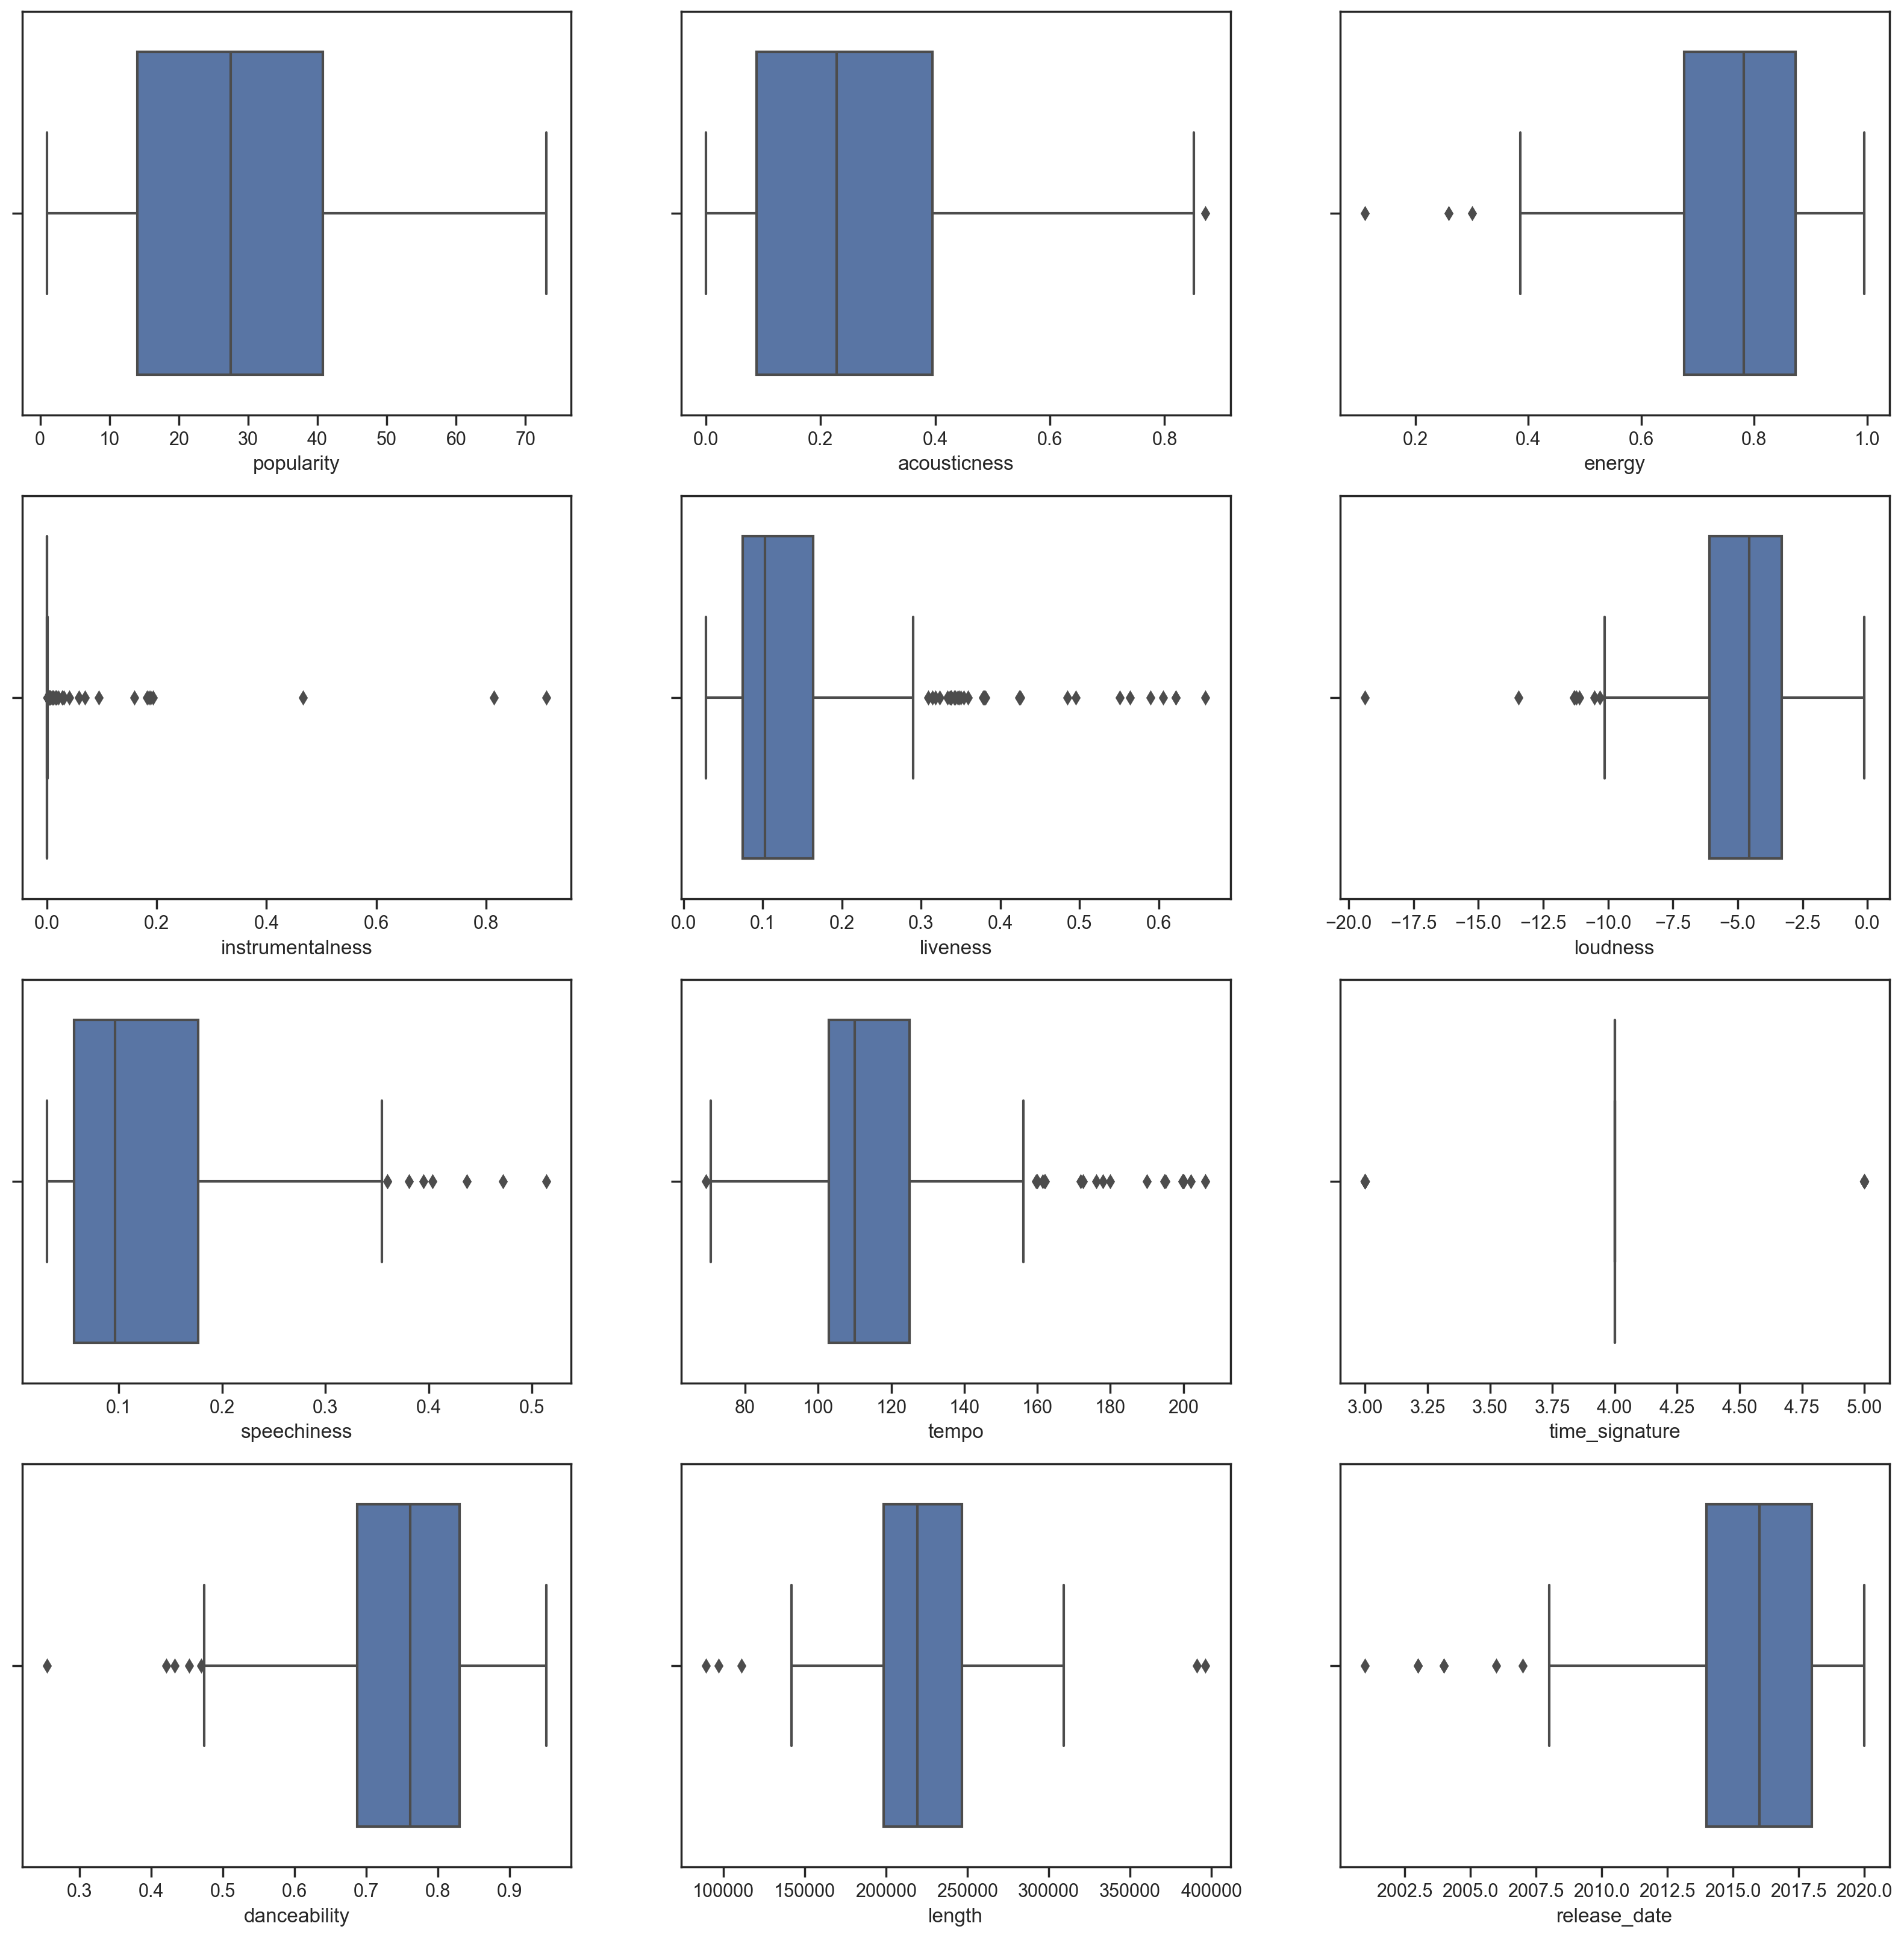

In [67]:
#Create a boxplot, calling boxplot() for each column to check for outliers:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = song_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = song_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = song_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = song_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = song_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = song_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = song_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = song_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = song_df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = song_df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = song_df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = song_df)

In [69]:
#choose which columns you will use for your clustering exercise
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = song_df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = song_df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

In [70]:
#pick how many clusters to target.
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0])

In [71]:
# calculate a 'silhouette score':
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

Build model

In [72]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-p

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(range(0, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

c:\Users\Engr. Moji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


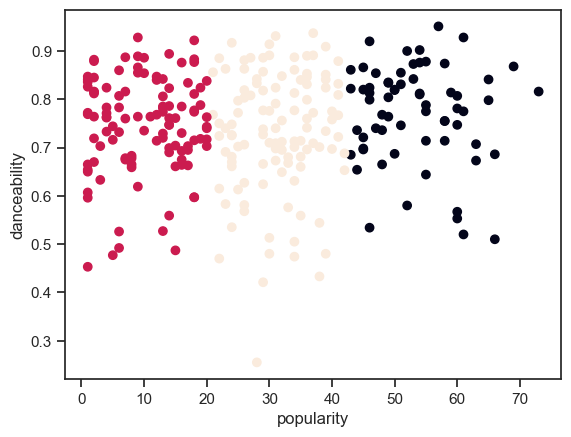

In [79]:
#display the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(song_df['popularity'],song_df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [80]:
#check model accuracy
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 69 out of 286 samples were correctly labeled.
Accuracy score: 0.24
